In [53]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import seaborn as sns

In [54]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Exercise 4.35

In [55]:
FR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/4.35.csv')
FR

,Observations,Flow,Uniformity
0,1,125,2.7
1,2,125,2.6
2,3,125,4.6
3,4,125,3.2
4,5,125,3.0
5,6,125,3.8
6,1,160,4.6
7,2,160,4.9
8,3,160,5.0
9,4,160,4.2


In [56]:
FR125=FR[FR['Flow']==125]['Uniformity']
FR125

0    2.7
1    2.6
2    4.6
3    3.2
4    3.0
5    3.8
Name: Uniformity, dtype: float64

In [57]:
FR160=FR[FR['Flow']==160]['Uniformity']
FR160

6     4.6
7     4.9
8     5.0
9     4.2
10    3.6
11    4.2
Name: Uniformity, dtype: float64

In [58]:
FR200=FR[FR['Flow']==200]['Uniformity']
FR200

12    4.6
13    2.9
14    3.4
15    3.5
16    4.1
17    5.1
Name: Uniformity, dtype: float64

In [59]:
stat, p = f_oneway(FR125, FR160, FR200)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Likely the same distribution')
else:
  print('Likely a different distribution')

stat=3.586, p=0.053
Likely the same distribution


(A) Flow rate doesn't affect etch uniformity. After performing an f-test, a p-value of 0.053 was calculated. Since p-value(0.053) > alpha(0.05), there is not a statistically signifigance difference between the variances. We fail to reject the null hypothesis.

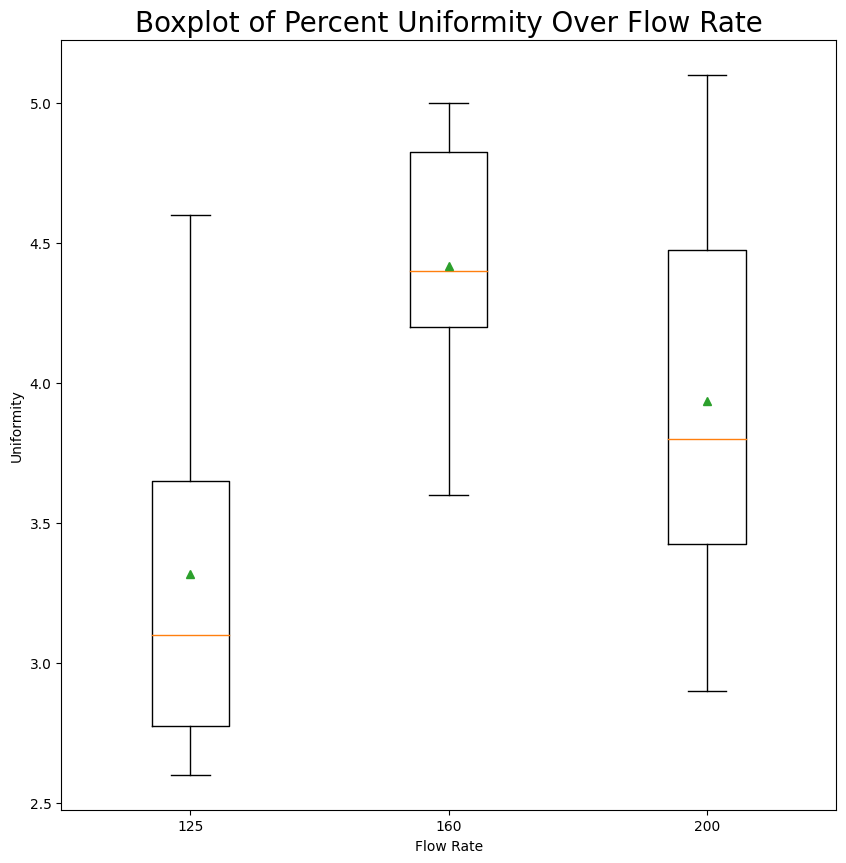

In [60]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Boxplot of Percent Uniformity Over Flow Rate" , fontsize= 20)
ax.set
box = [FR125, FR160, FR200]
ax.boxplot(box, labels= ['125', '160', '200'], showmeans= True)
plt.xlabel("Flow Rate")
plt.ylabel("Uniformity")
plt.show()

(B) The lowest uniformity should be chosen which is 125 flowrate

In [61]:
model = ols('Uniformity ~ C(Flow)', data=FR).fit()
Table = sm.stats.anova_lm(model, typ=2)
Table

,sum_sq,df,F,PR(>F)
C(Flow),3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [62]:
def table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov
table(Table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Flow),3.647778,2.0,1.823889,3.585627,0.053365
Residual,7.630000,15.0,0.508667,NaN,NaN


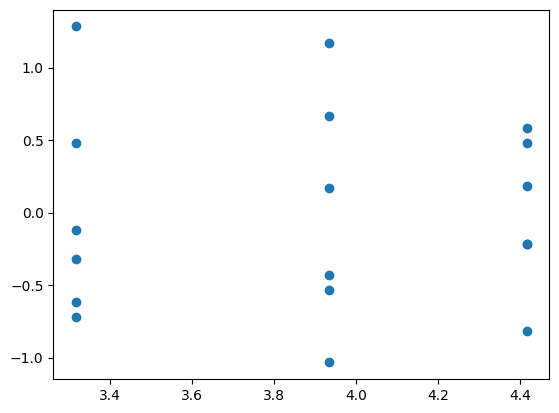

In [63]:
prediction=model.predict()
model.rsquared
model.rsquared_adj
residuals=model.resid
se= model.mse_resid
plt.scatter(prediction, residuals)
plt.show()

(C) This plot is normal, the standard error is about .5 which is how far away the points are from each other.

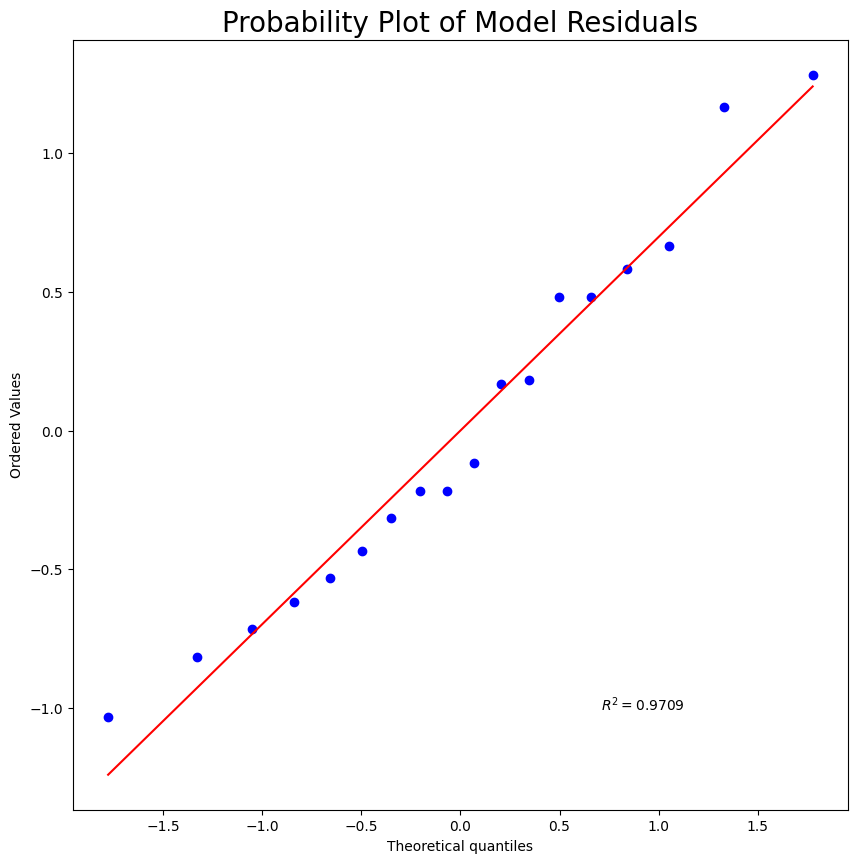

In [64]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Model Residuals", fontsize= 20)
ax.set
plt.show()

(D) Normality seems reasonible because of the r^2 value being close to one, and the fat pencil test.

In [65]:
mean125= FR125.mean()
mean160= FR160.mean()
mean200= FR200.mean()
resmean = .5086666666666666666666666666666666666666665
n = 6
scale = math.sqrt(resmean/n)
scale

0.2911662373589661

# Exercise 4.36

<Axes: ylabel='Density'>

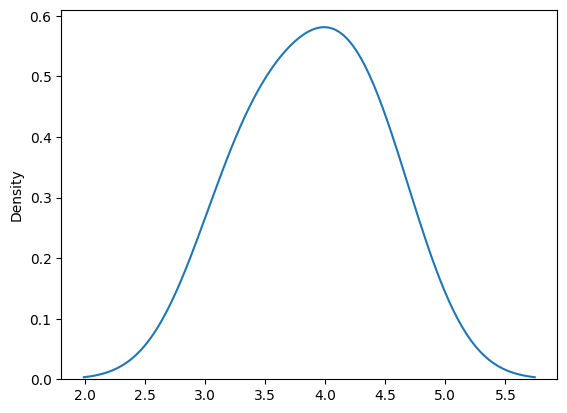

In [66]:
sns.kdeplot((mean125, mean160, mean200))

(4.36) After scaling my t-test with a factor of 0.3, the distribution curve appears to be a normal bell-shape curve. This tells us that variance is equal between the flow rates and therefore the means are also equal.

# Exercise 4.53

In [67]:
X = 31.400
m = 30
se_mean = .336
z = (X-m)/se_mean
p = scipy.stats.norm.sf(abs(z))*2
print('(A) Z=',z,'P=',p)

(A) Z= 4.1666666666666625 P= 3.09085937645925e-05


(B) Two Sided Test

In [68]:
stats.t.interval(0.95, df=14, loc=31.400, scale=0.336)

(30.679351672859912, 32.12064832714009)

In [69]:
SEmean='%.3f'%(math.sqrt((1.3*1.3/15)))
SEmean

'0.336'

In [70]:
p_value = scipy.stats.norm.sf(abs(z))
p_value

1.545429688229625e-05

P value when the mean is greater than 30

# Exercise 4.47

In [71]:
engine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/CSV/4.47.csv')
engine

,Brake HP,RPM,Octane,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1400,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


In [72]:
Horsepower = engine['Brake HP']
rpm = engine['RPM']
Octane = engine['Octane']
Compression = engine['Compression']
model2 = ols('Horsepower ~ Compression + rpm + Octane', data=engine).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
Compression,955.686576,1.0,11.418944,0.009653
rpm,395.164398,1.0,4.721590,0.061538
Octane,1015.298739,1.0,12.131216,0.008283
Residual,669.544599,8.0,NaN,NaN


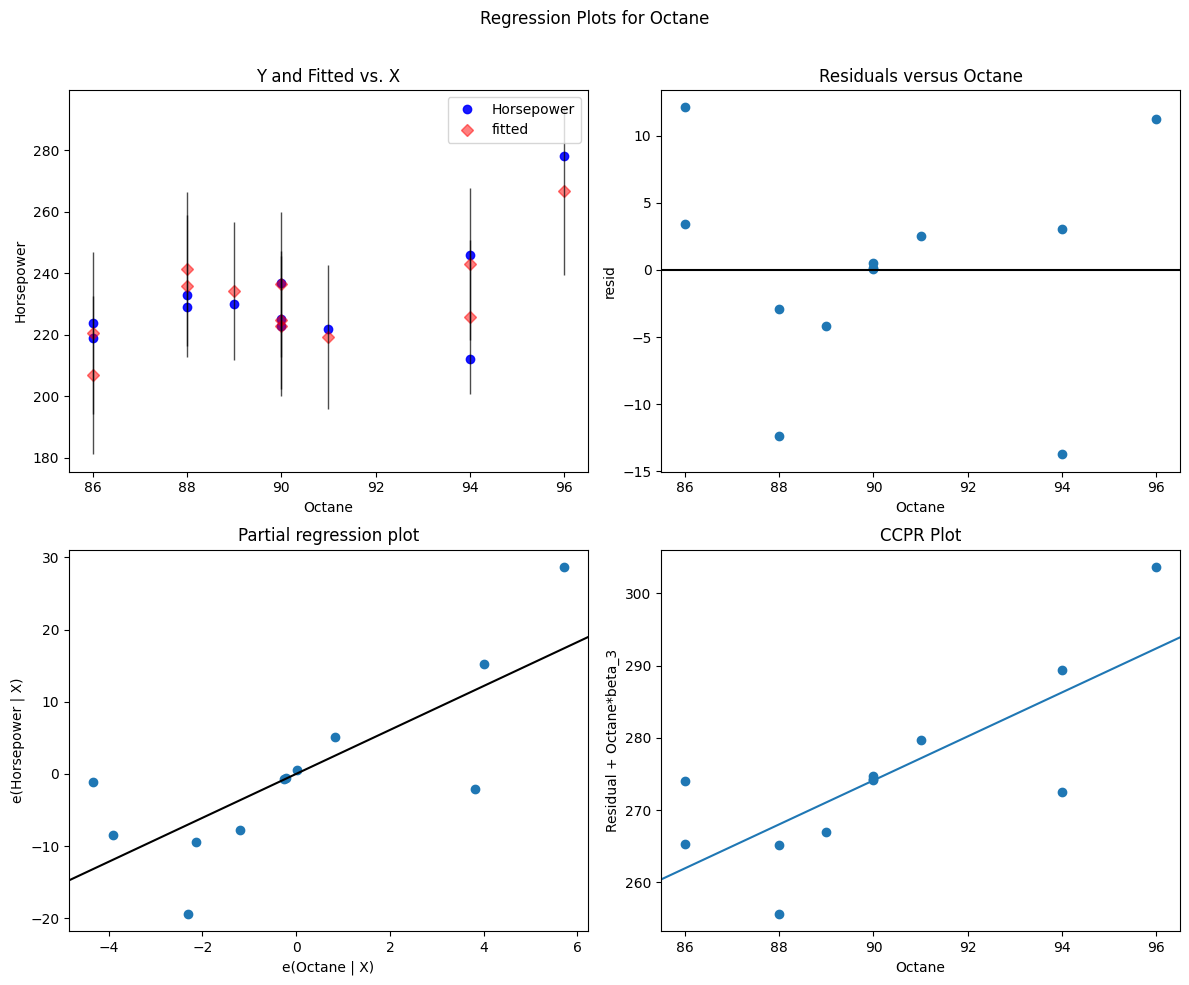

In [73]:
fig = plt.figure(figsize=(12,10))
fig = sm.graphics.plot_regress_exog(model2, 'Octane', fig=fig)

(B) The f-test produces a f-statistic of 11.12. This means we will have low p-values.

(C) Yes since all three regressor variables are below alpha of 0.05. They are all statistically signifigant.